In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
import tensorflow as tf

from lstm_normalize import prepare_data, add_indicators, add_lags, split_data, normalize_data, prepare_sequences, prepare_tensors, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER

tf.keras.backend.clear_session()

---

## For **prepare_data** function

(6058,)
(6058, 7)
Open         float64
High         float64
Low          float64
Close        float64
Change       float64
Volume         int64
Direction      int64
dtype: object


,Open,High,Low,Close,Change,Volume,Direction
0,1469.250000,1478.000000,1438.359985,1455.219971,-14.030029,931800000,0
1,1455.219971,1455.219971,1397.430054,1399.420044,-55.799927,1009000000,0
2,1399.420044,1413.270020,1377.680054,1402.109985,2.689941,1085500000,1
3,1402.109985,1411.900024,1392.099976,1403.449951,1.339966,1092300000,1
4,1403.449951,1441.469971,1400.729980,1441.469971,38.020020,1225200000,1
...,...,...,...,...,...,...,...
6053,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,1
6054,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,1
6055,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,1
6056,4925.890137,4931.089844,4916.270020,4924.970215,-0.919922,3836130000,0


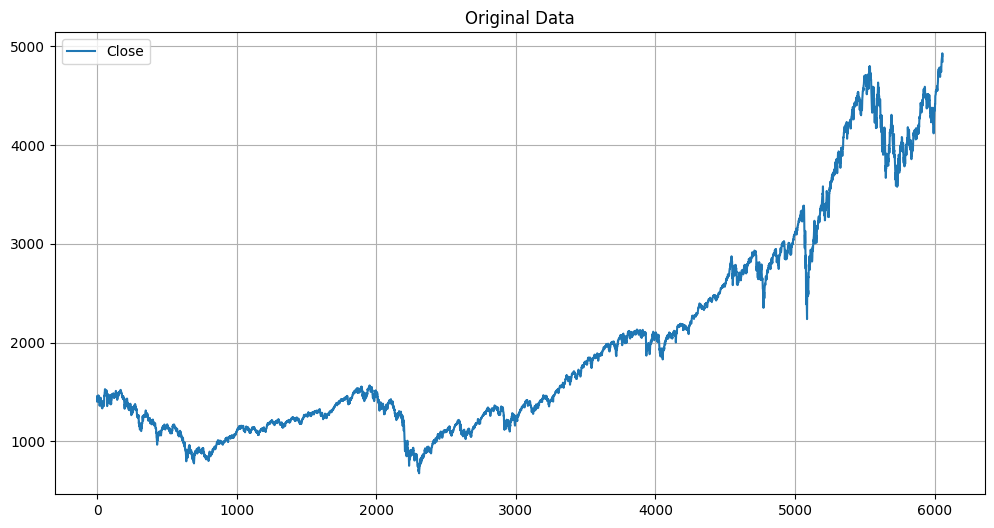

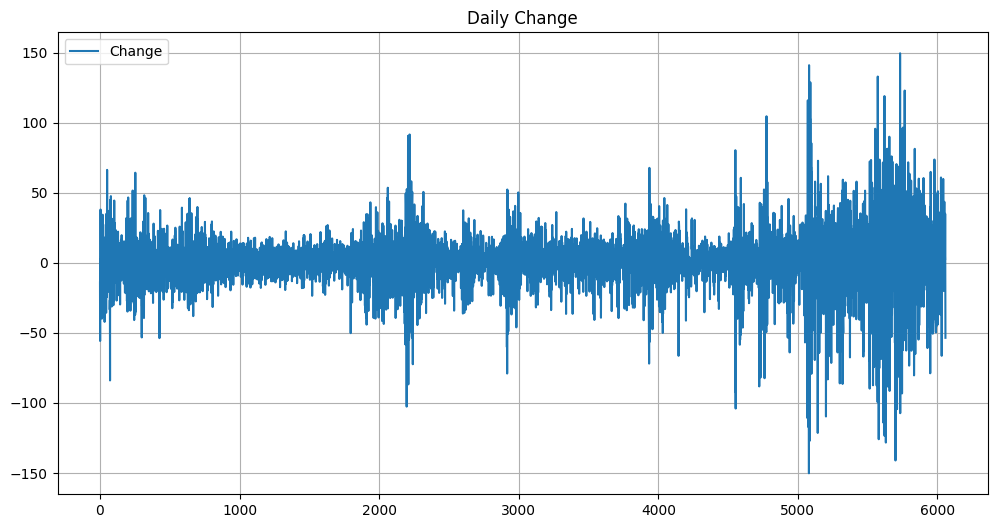

In [3]:
data, target = prepare_data(SP500_TICKER)


# Show data
print(target.shape)
print(data.shape)
print(data.dtypes)

plt = config_chart('Original Data')
plt.plot(data.Close)
plt.legend(['Close'])

plt = config_chart('Daily Change')
plt.plot(data.Change)
plt.legend(['Change'])

data

---

## For **add_indicators** function

,Open,High,Low,Close,Change,Volume,Direction,MA25,MA50,RSI
98,1400.719971,1403.770020,1373.430054,1373.859985,-26.859985,869900000,0,-57.906816,-79.689011,38.691864
99,1373.859985,1401.750000,1361.089966,1399.050049,25.190063,1152300000,1,-31.014355,-55.296948,44.377923
100,1399.050049,1411.650024,1373.930054,1381.520020,-17.530029,984500000,0,-46.706387,-72.614578,41.493795
101,1381.520020,1391.420044,1369.750000,1378.020020,-3.500000,722600000,0,-47.945586,-74.505579,40.921956
102,1378.020020,1422.449951,1378.020020,1422.449951,44.429932,844200000,1,-3.219253,-29.235247,50.287784
...,...,...,...,...,...,...,...,...,...,...
6053,4886.660156,4898.149902,4869.339844,4894.160156,7.500000,4020430000,1,118.863691,216.891133,72.932465
6054,4888.910156,4906.689941,4881.470215,4890.970215,2.060059,3353400000,1,110.769746,204.112783,72.142640
6055,4892.950195,4929.310059,4887.399902,4927.930176,34.979980,3525160000,1,138.546504,232.428145,75.458828
6056,4925.890137,4931.089844,4916.270020,4924.970215,-0.919922,3836130000,0,128.457734,221.026377,74.691975


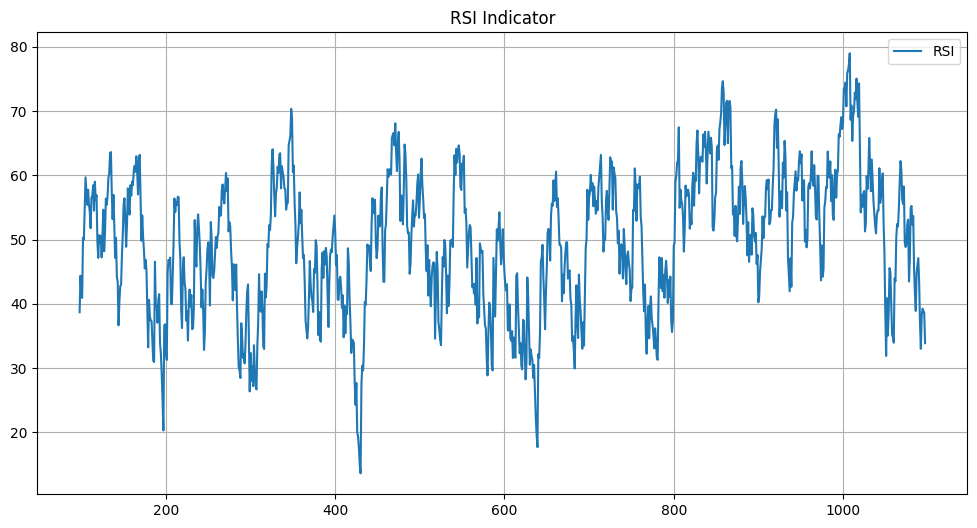

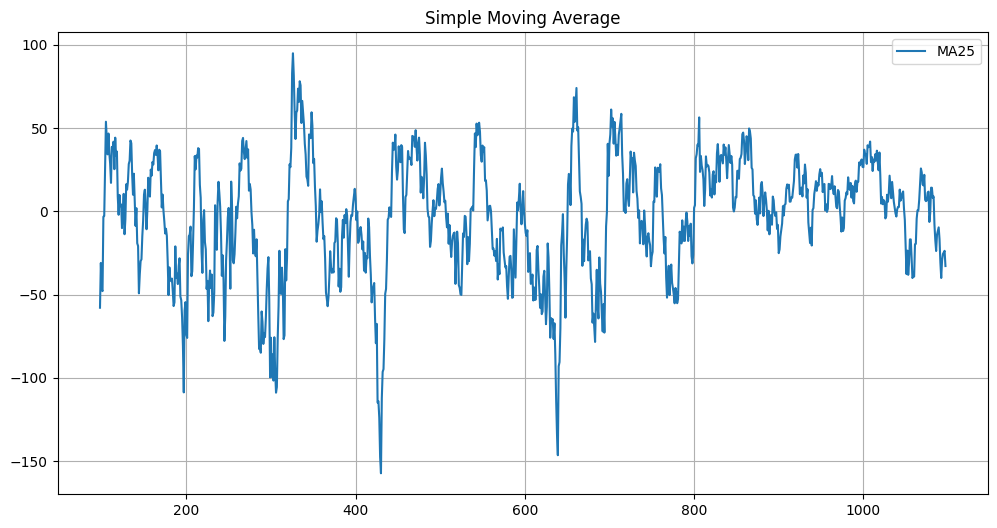

In [5]:
data = add_indicators(data)


# Show data
plt = config_chart('RSI Indicator')
plt.plot(data['RSI'][0:1000])
plt.legend(['RSI'])

plt = config_chart('Simple Moving Average')
plt.plot(data['MA25'][0:1000])
plt.legend(['MA25'])

# plt = config_chart('Stochastic')
# plt.plot(data['Stochastic_K'][0:1000])
# plt.plot(data['Stochastic_D'][0:1000])
# plt.legend([''])

data

---

## For add_lags function

In [ ]:
data = add_lags(data)


# Show data
data

---
## For split_data function

In [ ]:
# indicators_train, indicators_test, target_train, target_test = split_data(extended_data)


# # Show data
# indicators_train.shape, indicators_test.shape, target_train.shape, target_test.shape

---

## For **normalize_data** function

In [ ]:
data = normalize_data(data)


# Show data
# plt = config_chart('Normalized Data')
# plt.plot(data)
# plt.legend(['Open', 'High', 'Low', 'Close'])

data

----

## For **prepare_sequences** function

In [6]:
print(data)

data, target = prepare_sequences(data, target)

# Show data
print(data.shape)
print(data[0])
# print(x)

# print(y.shape)
# print(y[0])
# print(y)

# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 1])
# plt.plot(x_dates[0], x[0, :, 2])
# plt.plot(y_dates[0], y[0, :, 1])
# plt.plot(y_dates[0], y[0, :, 2])
# plt.legend(['Direction X', 'Change X', 'Direction Y', 'Change Y'])

# plt = config_chart('Last 10 Days Input and Next 3 Days Output Data')
# plt.plot(x_dates[0], x[0, :, 0])
# plt.plot(y_dates[0], y[0, :, 0])
# plt.legend(['Price X', 'Price Y'])


             Open         High          Low        Close     Change  \
98    1400.719971  1403.770020  1373.430054  1373.859985 -26.859985   
99    1373.859985  1401.750000  1361.089966  1399.050049  25.190063   
100   1399.050049  1411.650024  1373.930054  1381.520020 -17.530029   
101   1381.520020  1391.420044  1369.750000  1378.020020  -3.500000   
102   1378.020020  1422.449951  1378.020020  1422.449951  44.429932   
...           ...          ...          ...          ...        ...   
6053  4886.660156  4898.149902  4869.339844  4894.160156   7.500000   
6054  4888.910156  4906.689941  4881.470215  4890.970215   2.060059   
6055  4892.950195  4929.310059  4887.399902  4927.930176  34.979980   
6056  4925.890137  4931.089844  4916.270020  4924.970215  -0.919922   
6057  4899.189941  4906.750000  4845.149902  4845.649902 -53.540039   

          Volume  Direction        MA25        MA50        RSI  
98     869900000          0  -57.906816  -79.689011  38.691864  
99    1152300000 

---

## For **split_train_and_test_data** function

(4767, 1, 6)
(4767,)
(596, 1, 6)
(596,)
(596, 1, 6)
(596,)


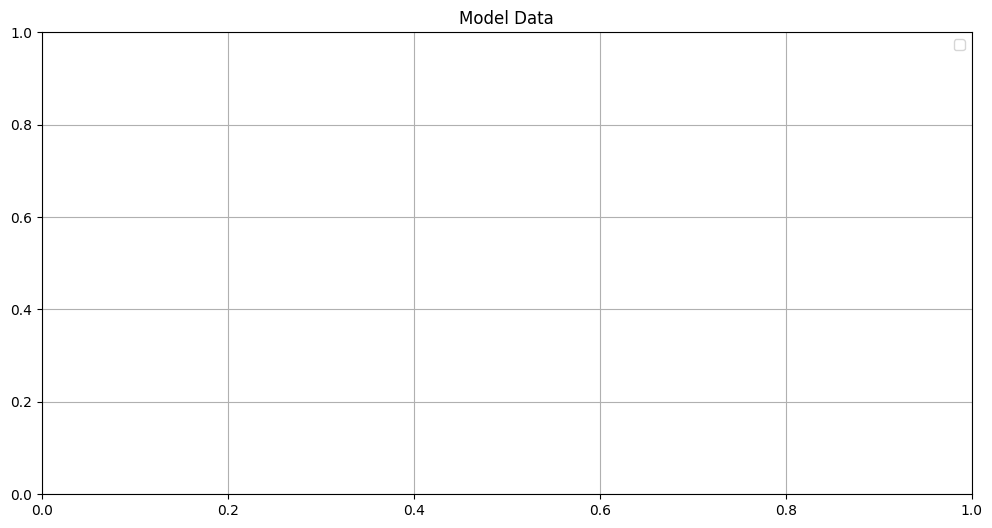

In [7]:
train, test, predict = split_train_and_test_data(data, target)


# Show data:
print(train["x"].shape)
print(train["y"].shape)

print(test["x"].shape)
print(test["y"].shape)

print(predict["x"].shape)
print(predict["y"].shape)

plt = config_chart('Model Data')
# plt.plot(train['y'][:, 0])
# plt.plot(test['y'][:, 0, 0])
# plt.plot(predict['y'][:, 0, 0])
plt.legend(['Train', 'Test', 'Predict'])

---

## For **prepare_tensors** function

In [ ]:
# x_train, y_train = prepare_tensors(train['x'], train['y'])
# x_test, y_test = prepare_tensors(test['x'], test['y'])
# x_predict, y_predict = prepare_tensors(predict['x'], predict['y'])

In [ ]:
# x_train.shape, y_train.shape

In [ ]:
# print('x_train:', x_train.shape)
# print(x_train[0])

In [ ]:
# print('y_train:', y_train.shape)
# print(y_train[0])

In [ ]:
# x_test.shape, y_test.shape

In [ ]:
# print('x_test:',x_test.shape)
# print(x_test[0])

In [ ]:
# print('y_test:',y_test.shape)
# print(y_test[0])

---

## For **get_lstm_data** function

In [8]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [9]:
print(train["x"].shape) 
print(train["x"][0])

print(train["y"].shape)
print(train["y"][0])


(4806, 1, 6)
[[0.166 0.161 0.42  0.414 0.684 0.661]]
(4806,)
1.0


In [10]:
print(test["x"].shape) 
print(test["x"][0])

print(test["y"].shape)
print(test["y"][0])

(601, 1, 6)
[[0.525 0.531 0.58  0.813 0.774 0.785]]
(601,)
0.0


In [11]:
print(predict["x"].shape) 
print(predict["x"][0])

print(predict["y"].shape)
print(predict["y"][0])

(601, 1, 6)
[[0.903 0.898 0.435 0.568 0.724 0.755]]
(601,)
0.0


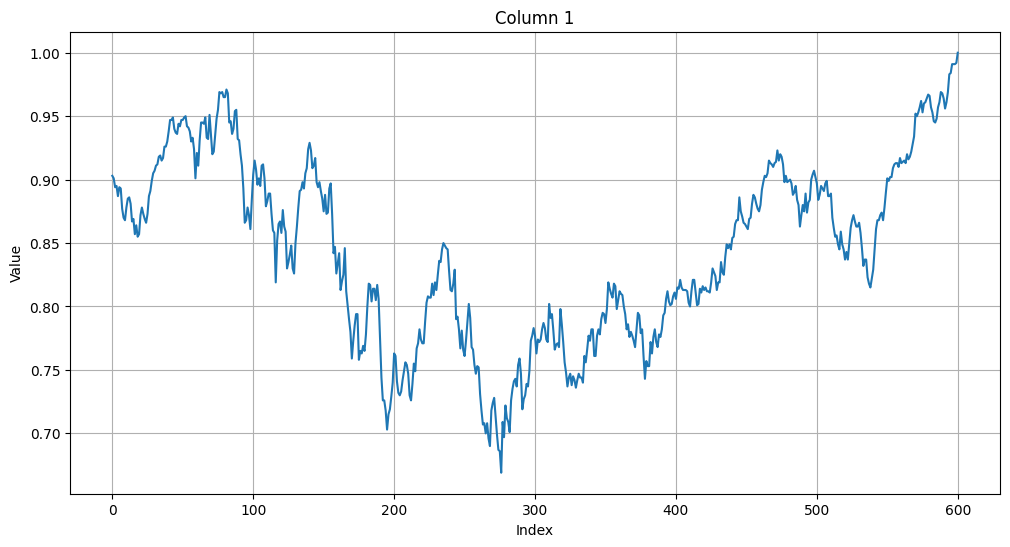

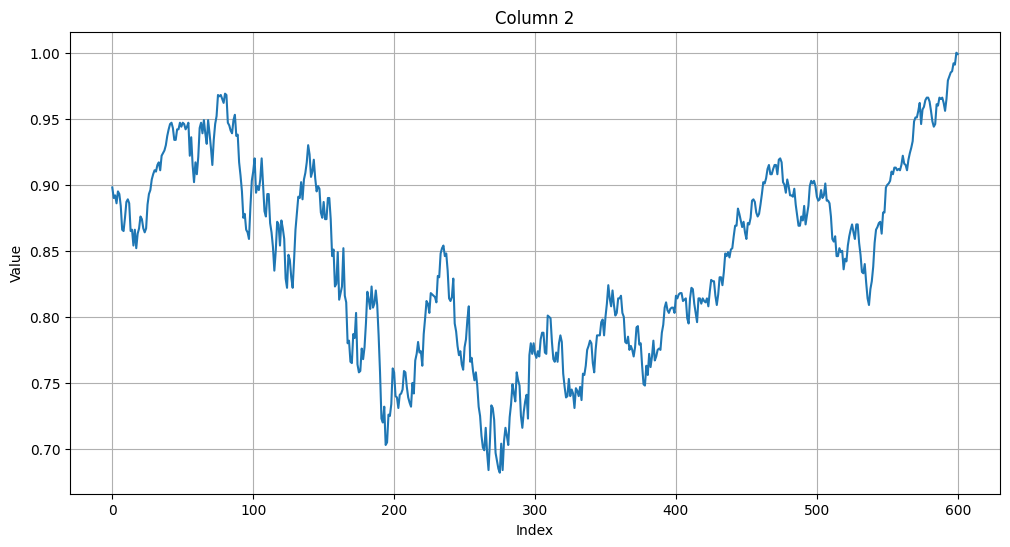

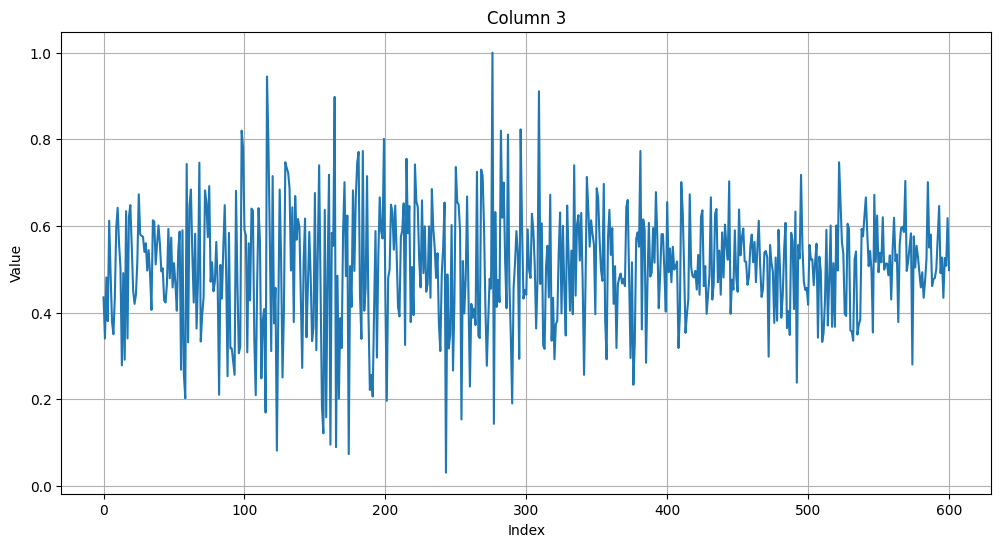

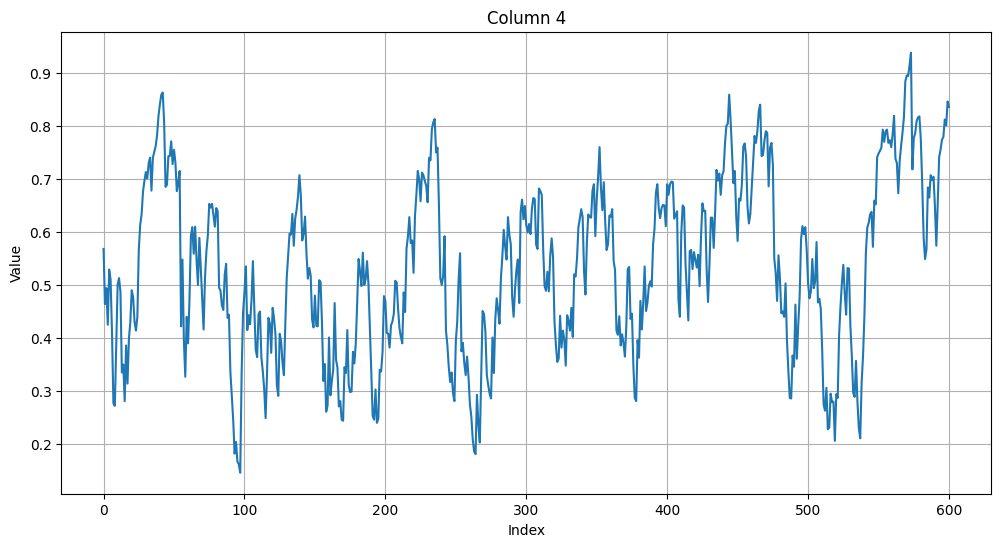

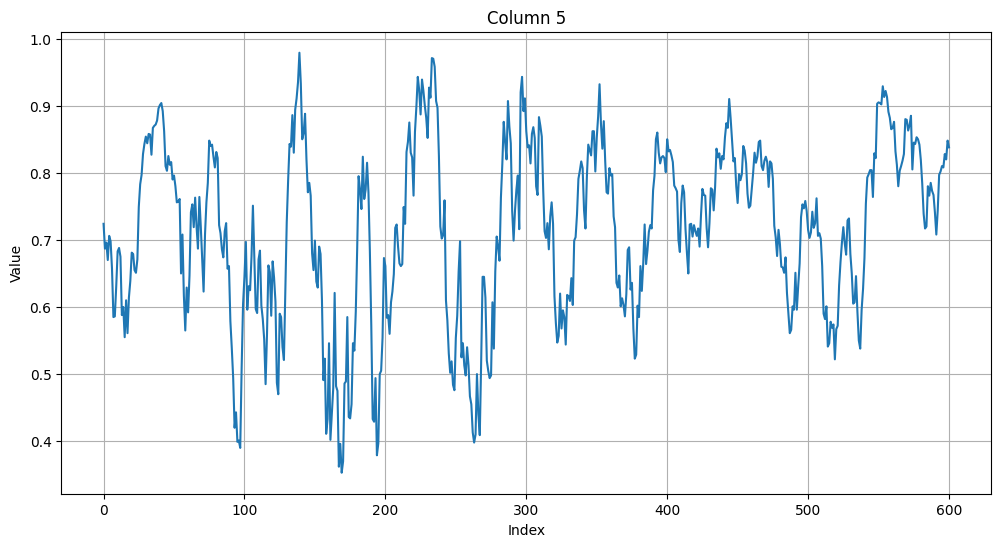

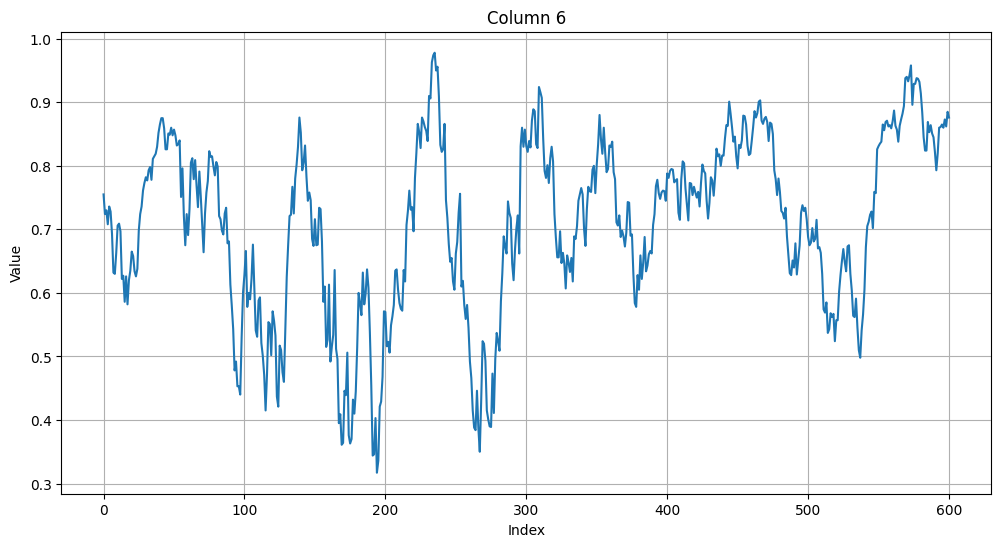

In [12]:
num_columns = data.shape[2]  # Get the number of columns
for i in range(num_columns):
    plt = config_chart('Model Data')
    plt.plot(predict["x"][:, 0, i])
    plt.title(f'Column {i+1}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()